# Deep Learning with PyTorch

The major source of this tutorial can be found [here](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

## What is PyTorch?

PyTorch is a Python-based scientific computing package serving two broad purposes:
- A replacement for NumPy to use the power of GPUs.
- An automatic differentiation library that is useful to implement neural networks.

## Goals of this tutorial:

- Install `torch` and `torchvision` packages.
- Understand PyTorch’s Tensor library and neural networks at a high level.
- Train a small neural network to classify images

## Install Pytorch

- Go to the pytorch [homepage](https://pytorch.org/)
- Click on install button on top left of the page that directs you into the [download page](https://pytorch.org/get-started/locally/)
- Choose correct cconfiguration for Pytorch Build, OS, Package, Language and Compute Platform.
- Run the installation command.

![Screenshot%20from%202021-03-23%2012-43-39.png](attachment:Screenshot%20from%202021-03-23%2012-43-39.png)

## TENSORS

- Tensors are a specialized data structure that are very similar to arrays and matrices. 

- In PyTorch, we use tensors to encode the **inputs** and **outputs** of a model, as well as the model’s **parameters**.

### Tensors vs NDArrays
Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs.

In [1]:
import torch
import numpy as np

### Tensor Initialization

Tensors can be initialized in various ways. Take a look at the following examples:

**Directly from data**

Tensors can be created directly from data. The data type is automatically inferred.

In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

**From a NumPy array**

Tensors can be created from NumPy arrays and vice versa

In [ ]:
x_numpy = np.array(data)
x_tensor = torch.from_numpy(x_numpy)
x_numpy_from_tensor = x_tensor.numpy()

**From another tensor:**

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.

In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.6484, 0.7860],
        [0.8405, 0.8911]]) 



**With random or constant values:**

`shape` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.

In [3]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.5249, 0.2054, 0.1994],
        [0.1415, 0.2876, 0.8238]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Tensor Attributes

Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Tensor Operations

Over 100 tensor operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random sampling, and more are available.

For more information check [here](https://pytorch.org/docs/stable/torch.html)

Each of them can be run on the **GPU** or **CPU**. If you’re using Colab, allocate a GPU by going to Edit > Notebook Settings.


In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

In [ ]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Joining tensors**

You can use `torch.cat` to concatenate a sequence of tensors along a given dimension

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)
print(t1.shape)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
torch.Size([12, 4])


In [ ]:
t2 = torch.cat([tensor, tensor, tensor], dim=1)
print(t2)
print(t2.shape)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])
torch.Size([4, 12])


In [ ]:
t3 = torch.stack([tensor, tensor, tensor], dim=0)
print(t3)
print(t3.shape)

tensor([[[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]])
torch.Size([3, 4, 4])


**Element-wise Multiplication**

In [ ]:
tensor = torch.rand(3, 4)
print(f"tensor \n {tensor} \n")
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor 
 tensor([[0.2251, 0.9508, 0.8289, 0.7133],
        [0.7992, 0.8233, 0.4037, 0.0809],
        [0.1303, 0.3681, 0.5525, 0.6809]]) 

tensor.mul(tensor) 
 tensor([[0.0507, 0.9039, 0.6871, 0.5088],
        [0.6387, 0.6778, 0.1629, 0.0065],
        [0.0170, 0.1355, 0.3052, 0.4636]]) 

tensor * tensor 
 tensor([[0.0507, 0.9039, 0.6871, 0.5088],
        [0.6387, 0.6778, 0.1629, 0.0065],
        [0.0170, 0.1355, 0.3052, 0.4636]])


**Matrix Multiplication**

In [ ]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[2.1504, 1.3549, 1.3229],
        [1.3549, 1.4859, 0.6852],
        [1.3229, 0.6852, 0.9212]]) 

tensor @ tensor.T 
 tensor([[2.1504, 1.3549, 1.3229],
        [1.3549, 1.4859, 0.6852],
        [1.3229, 0.6852, 0.9212]])


**In-Place Operations**

In [ ]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[0.2251, 0.9508, 0.8289, 0.7133],
        [0.7992, 0.8233, 0.4037, 0.0809],
        [0.1303, 0.3681, 0.5525, 0.6809]]) 

tensor([[5.2251, 5.9508, 5.8289, 5.7133],
        [5.7992, 5.8233, 5.4037, 5.0809],
        [5.1303, 5.3681, 5.5525, 5.6809]])


**<font color='red'>NOTE</font>**

In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss of history. Hence, their use is discouraged.

## AUTOMATIC DIFFERENTIATION

`torch.autograd` is PyTorch’s automatic differentiation engine that powers neural network training.

### Training a NN happens in two steps:

**Forward Propagation**: In forward prop, the NN makes its best guess about the correct output. It runs the input data through each of its functions to make this guess.

**Backward Propagation**: In backprop, the NN adjusts its parameters proportionate to the error in its guess. It does this by traversing backwards from the output, collecting the derivatives of the error with respect to the parameters of the functions (gradients), and optimizing the parameters using gradient descent.

### Usage in PyTorch

Let’s take a look at a single training step. For this example, we load a pretrained resnet18 model from `torchvision`. We create a random data tensor to represent a single image with 3 channels, and height & width of 64, and its corresponding label initialized to some random values.

In [8]:
import torch, torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

**Forward Propagation**

In [ ]:
prediction = model(data)
loss = (prediction - labels).sum()
loss

tensor(-502.5748, grad_fn=<SumBackward0>)

**Backward Propagation**

The next step is to backpropagate this error through the network. Backward propagation is kicked off when we call `.backward()` on the error tensor. Autograd then calculates and stores the gradients for each model parameter in the parameter’s `.grad` attribute.

In [ ]:
loss.backward()

Next, we load an optimizer, in this case SGD with a learning rate of 0.01 and momentum of 0.9. We register all the parameters of the model in the optimizer.

In [ ]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

Finally, we call `.step()` to initiate gradient descent. The optimizer adjusts each parameter by its gradient stored in `.grad`.

In [ ]:
optim.step()

**<font color='green'>At this point, you have everything you need to train your neural network.</font>**

### Differentiation in Autograd

Let’s take a look at how `autograd` collects gradients. We create two tensors `a` and `b` with `requires_grad=True`. This signals to `autograd` that every operation on them should be tracked.

In [ ]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

We create another tensor `Q` from `a` and `b`.

In [ ]:
Q = 3*a**3 - b**2
a.shape

torch.Size([2])

We need to explicitly pass a `gradient` argument in `Q.backward()` because it is a vector. `gradient` is a tensor of the same shape as `Q`, and it represents the gradient of `Q` w.r.t. itself, i.e.

In [ ]:
external_grad = torch.tensor([1., 1.])
Q.backward(external_grad)

Gradients are now deposited in `a.grad` and `b.grad`.

Check if collected gradients are correct:

In [ ]:
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


### Computational Graph

Conceptually, autograd keeps a record of data (tensors) & all executed operations (along with the resulting new tensors) in a directed acyclic graph (DAG) consisting of Function objects. In this DAG, leaves are the input tensors, roots are the output tensors. By tracing this graph from roots to leaves, you can automatically compute the gradients using the chain rule.

In a forward pass, `autograd` does two things simultaneously:
- run the requested operation to compute a resulting tensor, and
- maintain the operation’s gradient function in the DAG.

The backward pass kicks off when `.backward()` is called on the DAG root. `autograd` then:
- computes the gradients from each `.grad_fn`,
- accumulates them in the respective tensor’s `.grad` attribute, and
- using the chain rule, propagates all the way to the leaf tensors.


Below is a visual representation of the DAG in our example. In the graph, the arrows are in the direction of the forward pass. The nodes represent the backward functions of each operation in the forward pass. The leaf nodes in blue represent our leaf tensors `a` and `b`.

![dag_autograd.png](attachment:dag_autograd.png)

**DAGs are dynamic in PyTorch**

An important thing to note is that the graph is recreated from scratch after each `.backward()` call, `autograd` starts populating a new graph. This is exactly what allows you to use control flow statements in your model. You can change the shape, size and operations at every iteration if needed.

**Exclusion from the DAG**

`torch.autograd` tracks operations on all tensors which have their `requires_grad` flag set to `True`. For tensors that don’t require gradients, setting this attribute to `False` excludes it from the gradient computation DAG.

*Why exclusion does help?*

- <font color='blue'>forzan parameters</font>: In a NN, parameters that don’t compute gradients are usually called **frozen parameters**. It is useful to **freeze** part of your model if you know in advance that you won’t need the gradients of those parameters (this offers some performance benefits by reducing autograd computations).
- <font color='blue'>finetuning a pretrained network</font>: In finetuning, we freeze most of the model and typically only modify the classifier layers to make predictions on new labels. 

In [ ]:
from torch import nn, optim

model = torchvision.models.resnet18(pretrained=True)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

Let’s say we want to finetune the model on a new dataset with 10 labels. In resnet, the classifier is the last linear layer `model.fc`. We can simply replace it with a new linear layer (unfrozen by default) that acts as our classifier.

In [ ]:
model.fc = nn.Linear(512, 10)

Now all parameters in the model, except the parameters of model.fc, are frozen. The only parameters that compute gradients are the weights and bias of `model.fc`.

In [ ]:
# Optimize only the classifier
optimizer = optim.SGD(model.fc.parameters(), lr=1e-2, momentum=0.9)

Notice although we register all the parameters in the optimizer, the only parameters that are computing gradients (and hence updated in gradient descent) are the weights and bias of the classifier.

## NEURAL NETWORKS

Now that you had a glimpse of `autograd`, `nn` depends on `autograd` to define models and differentiate them. An `nn.Module` contains layers, and a method `forward(input)` that returns the `output`.

A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule: `weight = weight - learning_rate * gradient`

### Define the network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


**NOTE**

- You just have to define the forward function.
- The backward function (where gradients are computed) is automatically defined using autograd.
- You can use any of the Tensor operations in the forward function.

The learnable parameters of a model are returned by `net.parameters()`

In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 3, 3])


Let’s try a random 32x32 input. Note: expected input size of this net (LeNet) is 32x32. To use this net on the MNIST dataset, please resize the images from the dataset to 32x32.

In [ ]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0329, -0.0149, -0.0215,  0.0577, -0.0259, -0.0517,  0.0304, -0.0427,
         -0.0803, -0.0709]], grad_fn=<AddmmBackward>)


Zero the gradient buffers of all parameters and backprops with random gradients:

In [ ]:
net.zero_grad()
out.backward(torch.randn(1, 10))

**NOTE**
- `torch.nn` only supports mini-batches. The entire torch.nn package only supports inputs that are a mini-batch of samples, and not a single sample. For example, `nn.Conv2d` will take in a 4D Tensor of `nSamples x nChannels x Height x Width`.
- If you have a single sample, just use `input.unsqueeze(0)` to add a fake batch dimension.

**Before proceeding further, let’s recap all the classes you’ve seen so far.**

- torch.Tensor - A multi-dimensional array with support for autograd operations like backward(). Also holds the gradient w.r.t. the tensor.
- nn.Module - Neural network module. Convenient way of encapsulating parameters, with helpers for moving them to GPU, exporting, loading, etc.
- nn.Parameter - A kind of Tensor, that is automatically registered as a parameter when assigned as an attribute to a Module.
- autograd.Function - Implements forward and backward definitions of an autograd operation. Every Tensor operation creates at least a single Function node that connects to functions that created a Tensor and encodes its history.

**At this point, we covered:**
- Defining a neural network
- Processing inputs and calling backward

**Still Left:**
- Computing the loss
- Updating the weights of the network

### Loss Function
A loss function takes the (output, target) pair of inputs, and computes a value that estimates how far away the output is from the target.

There are several different loss functions under the `nn` package . A simple loss is: `nn.MSELoss` which computes the mean-squared error between the input and the target.

In [ ]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.0343, grad_fn=<MseLossBackward>)


Now, if you follow `loss` in the backward direction, using its `.grad_fn` attribute, you will see a graph of computations that looks like this:


input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
      -> view -> linear -> relu -> linear -> relu -> linear
      -> MSELoss
      -> loss

So, when we call `loss.backward()`, the whole graph is differentiated w.r.t. the `loss`, and all Tensors in the graph that has `requires_grad=True` will have their `.grad` Tensor accumulated with the gradient.



### Backprop

To backpropagate the error all we have to do is to `loss.backward()`. You need to clear the existing gradients though, else gradients will be accumulated to existing gradients.

Now we shall call `loss.backward()`, and have a look at conv1’s bias gradients before and after the backward.

In [ ]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0047, -0.0021, -0.0105, -0.0027, -0.0152,  0.0133])


The neural network package contains various modules and loss functions that form the building blocks of deep neural networks. A full list with documentation is [here](https://pytorch.org/docs/nn).

### Update the weights

There are several update rules according to optimization alogrithm used. The simplest update rule used in practice is the Stochastic Gradient Descent (SGD):

`weight = weight - learning_rate * gradient`

We can implement this using simple Python code:

In [ ]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

However, as you use neural networks, you want to use various different update rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc. To enable this, we built a small package: torch.optim that implements all these methods. Using it is very simple:

In [ ]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

**NOTE**

Observe how gradient buffers had to be manually set to zero using `optimizer.zero_grad()`. This is because gradients are accumulated as explained in the Backprop section.

## TRAINING A CLASSIFIER

Until now, you have seen how to define neural networks, compute loss and make updates to the weights of the network.

### What about data?


Generally, when you have to deal with image, text, audio or video data, you can use standard python packages that load data into a numpy array. Then you can convert this array into a `torch.Tensor`.

- For images, packages such as Pillow, OpenCV are useful
- For audio, packages such as scipy and librosa
- For text, either raw Python or Cython based loading, or NLTK and SpaCy are useful

Specifically for vision, there is a package called `torchvision`, that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz., `torchvision.datasets` and `torch.utils.data.DataLoader`.

### Training an image classifier

We will do the following steps in order:

- Load and normalizing the CIFAR10 training and test datasets using torchvision
- Define a Convolutional Neural Network
- Define a loss function
- Train the network on the training data
- Test the network on the test data

#### 1. Loading and normalizing CIFAR10

Using `torchvision`, it’s extremely easy to load CIFAR10.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1]. .. note:

If running on Windows and you get a BrokenPipeError, try setting
the num_worker of torch.utils.data.DataLoader() to 0.

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images.

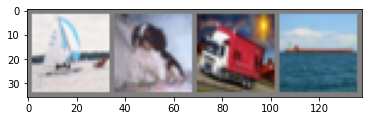

 ship   dog truck  ship


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#### 2. Define a Convolutional Neural Network

Copy the neural network from the Neural Networks section before and modify it to take 3-channel images (instead of 1-channel images as it was defined).

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

#### 3. Define a Loss function and optimizer

Let’s use a Classification Cross-Entropy loss and SGD with momentum.

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#### 4. Train the network

This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.151
[1,  4000] loss: 1.793
[1,  6000] loss: 1.656
[1,  8000] loss: 1.592
[1, 10000] loss: 1.538
[1, 12000] loss: 1.494
[2,  2000] loss: 1.397
[2,  4000] loss: 1.374
[2,  6000] loss: 1.364
[2,  8000] loss: 1.344
[2, 10000] loss: 1.294
[2, 12000] loss: 1.291
Finished Training


Let’s quickly save our trained model:

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

#### 5. Test the network on the test data

We have trained the network for 2 passes over the training dataset. But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.

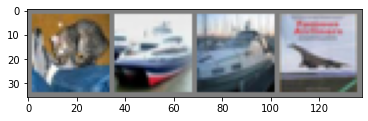

GroundTruth:    cat  ship  ship plane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Next, let’s load back in our saved model (note: saving and re-loading the model wasn’t necessary here, we only did it to illustrate how to do so):

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)


The outputs are energies for the 10 classes. The higher the energy for a class, the more the network thinks that the image is of the particular class. So, let’s get the index of the highest energy:


In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


Let us look at how the network performs on the whole dataset.

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


#### Training on GPU

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


The rest of this section assumes that `device` is a CUDA device.

Then these methods will recursively go over all modules and convert their parameters and buffers to CUDA tensors:



In [ ]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

**NOTE**

Remember that you will have to send the inputs and targets at every step to the GPU too:

In [ ]:
inputs, labels = data[0].to(device), data[1].to(device)


Why dont I notice MASSIVE speedup compared to CPU? Because your network is really small.

